In [1]:
from google.colab import drive                  
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import glob
import numpy as np
import pandas as pd 

In [3]:
glob.glob('/content/drive/MyDrive/JV/train/*')

['/content/drive/MyDrive/JV/train/Yoshi',
 '/content/drive/MyDrive/JV/train/Daisy',
 '/content/drive/MyDrive/JV/train/Harmonie',
 '/content/drive/MyDrive/JV/train/Tiny Kong',
 '/content/drive/MyDrive/JV/train/Waluigi']

In [4]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array

In [5]:
def prepare_dataset(path,label):
    x_train=[]
    y_train=[]
    all_images_path=glob.glob(path+'/*.jpg')
    for img_path in all_images_path :
            img=load_img(img_path, target_size=(150,150))
            img=img_to_array(img)
            img=img/255.0
            x_train.append(img)
            y_train.append(label)
    return np.array(x_train),np.array(y_train)

In [6]:
trainX_Daisy, trainY_Daisy  = prepare_dataset("/content/drive/MyDrive/JV/train/Daisy/",0)
trainX_Harmonie,trainY_Harmonie  = prepare_dataset("/content/drive/MyDrive/JV/train/Harmonie/",1)
trainX_Tiny_Kong,trainY_Tiny_Kong  = prepare_dataset("/content/drive/MyDrive/JV/train/Tiny Kong/",2)
trainX_Waluigi,trainY_Waluigi  = prepare_dataset("/content/drive/MyDrive/JV/train/Waluigi/",3)
trainX_Yoshi,trainY_Yoshi  = prepare_dataset("/content/drive/MyDrive/JV/train/Yoshi/",4)

x_train=np.concatenate((trainX_Daisy,trainX_Harmonie,trainX_Tiny_Kong,trainX_Waluigi ,trainX_Yoshi),axis=0)
y_train=np.concatenate((trainY_Daisy,trainY_Harmonie,trainY_Tiny_Kong,trainY_Waluigi ,trainY_Yoshi),axis=0)

print(x_train.shape)
print(y_train.shape)

testX_Daisy, testY_Daisy  = prepare_dataset("/content/drive/MyDrive/JV/test/Daisy/",0)
testX_Harmonie,testY_Harmonie  = prepare_dataset("/content/drive/MyDrive/JV/test/Harmonie/",1)
testX_Tiny_Kong,testY_Tiny_Kong  = prepare_dataset("/content/drive/MyDrive/JV/test/Tiny Kong/",2)
testX_Waluigi,testY_Waluigi  = prepare_dataset("/content/drive/MyDrive/JV/test/Waluigi/",3)
testX_Yoshi,testY_Yoshi  = prepare_dataset("/content/drive/MyDrive/JV/test/Yoshi/",4)

x_test=np.concatenate((testX_Daisy,testX_Harmonie,testX_Tiny_Kong,testX_Waluigi ,testX_Yoshi),axis=0)
y_test=np.concatenate((testY_Daisy,testY_Harmonie,testY_Tiny_Kong,testY_Waluigi ,testY_Yoshi),axis=0)

print(x_test.shape)
print(y_test.shape)


(459, 150, 150, 3)
(459,)
(204, 150, 150, 3)
(204,)


In [7]:
import numpy as np
import os
from sklearn.metrics import confusion_matrix
import seaborn as sns
import pandas as pd
from fastai.vision import *
from fastai import *
import matplotlib.pyplot as plt             
import cv2  #openCV  
import seaborn as sns
import tensorflow as tf 
from tensorflow.keras import layers
from tensorflow.keras import Model
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.preprocessing.image import ImageDataGenerator
from keras.utils.np_utils import to_categorical
from keras.layers import Activation, Flatten, MaxPool2D, ReLU
from keras.layers import Conv2D, BatchNormalization
from tqdm import tqdm
from sklearn.utils import shuffle

In [8]:
x_train /= 255

x_test /= 255

print('x_train shape:', x_train.shape)

print('Number of images in x_train', x_train.shape[0])

print('Number of images in x_test', x_test.shape[0])
import pandas as pd

train_images=x_train
train_labels=y_train

train_df = pd.DataFrame([train_images, train_labels],index=['train_images', 'train_labels']).T

x_train shape: (459, 150, 150, 3)
Number of images in x_train 459
Number of images in x_test 204


/usr/local/lib/python3.7/dist-packages/pandas/core/internals/construction.py:305: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  values = np.array([convert(v) for v in values])


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


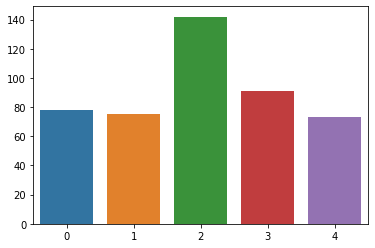

In [9]:
_, train_counts = np.unique(y_train, return_counts=True)
sns.barplot(_, train_counts)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


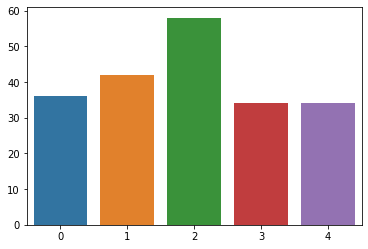

In [10]:
_, test_images = np.unique(y_test, return_counts=True)
sns.barplot(_, test_images)

Epoch 1/10
4/4 [==============================] - 7s 1s/step - loss: 2.3171 - accuracy: 0.2384 - val_loss: 8.0481 - val_accuracy: 0.0000e+00
Epoch 2/10
4/4 [==============================] - 5s 1s/step - loss: 1.5147 - accuracy: 0.3354 - val_loss: 8.6780 - val_accuracy: 0.0000e+00
Epoch 3/10
4/4 [==============================] - 5s 1s/step - loss: 1.5333 - accuracy: 0.2741 - val_loss: 3.9071 - val_accuracy: 0.0000e+00
Epoch 4/10
4/4 [==============================] - 5s 1s/step - loss: 1.2563 - accuracy: 0.3665 - val_loss: 3.3968 - val_accuracy: 0.0000e+00
Epoch 5/10
4/4 [==============================] - 5s 1s/step - loss: 1.2945 - accuracy: 0.4667 - val_loss: 4.3213 - val_accuracy: 0.0000e+00
Epoch 6/10
4/4 [==============================] - 5s 1s/step - loss: 1.1637 - accuracy: 0.4909 - val_loss: 4.3825 - val_accuracy: 0.0000e+00
Epoch 7/10
4/4 [==============================] - 5s 1s/step - loss: 1.2221 - accuracy: 0.3585 - val_loss: 4.7547 - val_accuracy: 0.0000e+00
Epoch 8/10
4/

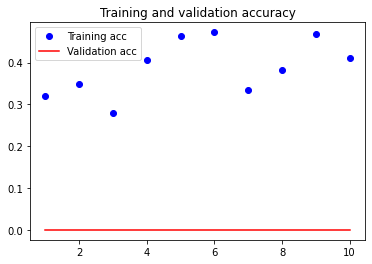

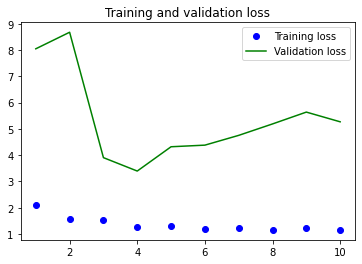

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


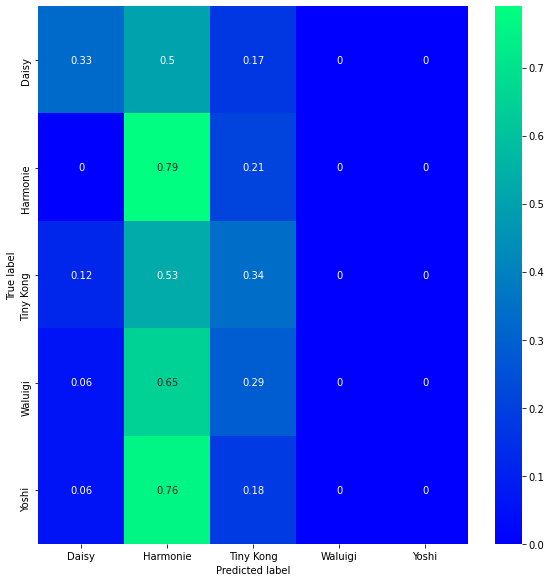

In [11]:
import matplotlib.pyplot as plt
import keras
from sklearn.metrics import confusion_matrix
import itertools
import tensorflow as tf
import seaborn as sns


CNN1 = keras.Sequential()
CNN1.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', strides=(1,1)))
CNN1.add(keras.layers.Flatten())
CNN1.add(keras.layers.Dense(64, activation='relu'))
CNN1.add(keras.layers.Dense(15, activation='softmax'))
 
CNN1.compile(optimizer=keras.optimizers.Adam(lr=1e-3), loss='sparse_categorical_crossentropy',metrics='accuracy')
 
history = CNN1.fit(x_train, y_train, epochs=10, batch_size=100, validation_split=0.33)
    
print("Test evaluation")
CNN1.evaluate(x_test, y_test)

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'g', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

class_names = ['Daisy','Harmonie', 'Tiny Kong', 'Waluigi', 'Yoshi']
y_pred=CNN1.predict_classes(x_test)
con_mat = tf.math.confusion_matrix(labels=y_test, predictions=y_pred).numpy()
con_mat_norm = np.around(con_mat.astype('float') / con_mat.sum(axis=1)[:, np.newaxis], decimals=2)
con_mat_df = pd.DataFrame(con_mat_norm,
                     index = class_names, 
                     columns = class_names)
  
figure = plt.figure(figsize=(8, 8))
sns.heatmap(con_mat_df, annot=True,cmap=plt.cm.winter)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [12]:
score_train = CNN1.evaluate(x_train, y_train, verbose=1)
print(f'Train results - Loss: {score_train[0]} - Accuracy: {score_train[1]}')
score_test = CNN1.evaluate(x_test, y_test, verbose=1)
print(f'Test results - Loss: {score_test[0]} - Accuracy: {score_test[1]}')

15/15 [==============================] - 2s 132ms/step - loss: 2.4925 - accuracy: 0.3181
Train results - Loss: 2.492457389831543 - Accuracy: 0.3180827796459198
7/7 [==============================] - 1s 127ms/step - loss: 2.4864 - accuracy: 0.3186
Test results - Loss: 2.4863598346710205 - Accuracy: 0.3186274468898773


Epoch 1/10
4/4 [==============================] - 8s 2s/step - loss: 2.6121 - accuracy: 0.2147 - val_loss: 5.4694 - val_accuracy: 0.0000e+00
Epoch 2/10
4/4 [==============================] - 7s 2s/step - loss: 1.5021 - accuracy: 0.4151 - val_loss: 7.9232 - val_accuracy: 0.0000e+00
Epoch 3/10
4/4 [==============================] - 7s 2s/step - loss: 1.4279 - accuracy: 0.4453 - val_loss: 3.6837 - val_accuracy: 0.0000e+00
Epoch 4/10
4/4 [==============================] - 7s 2s/step - loss: 1.3035 - accuracy: 0.4667 - val_loss: 4.1699 - val_accuracy: 0.0000e+00
Epoch 5/10
4/4 [==============================] - 7s 2s/step - loss: 1.5254 - accuracy: 0.2503 - val_loss: 5.5241 - val_accuracy: 0.0000e+00
Epoch 6/10
4/4 [==============================] - 7s 2s/step - loss: 1.4096 - accuracy: 0.4511 - val_loss: 4.8957 - val_accuracy: 0.0000e+00
Epoch 7/10
4/4 [==============================] - 7s 2s/step - loss: 1.4653 - accuracy: 0.2414 - val_loss: 3.9542 - val_accuracy: 0.0000e+00
Epoch 8/10
4/

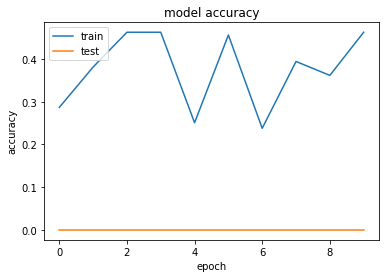

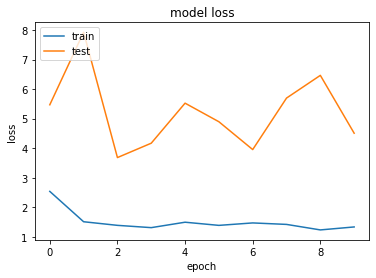

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


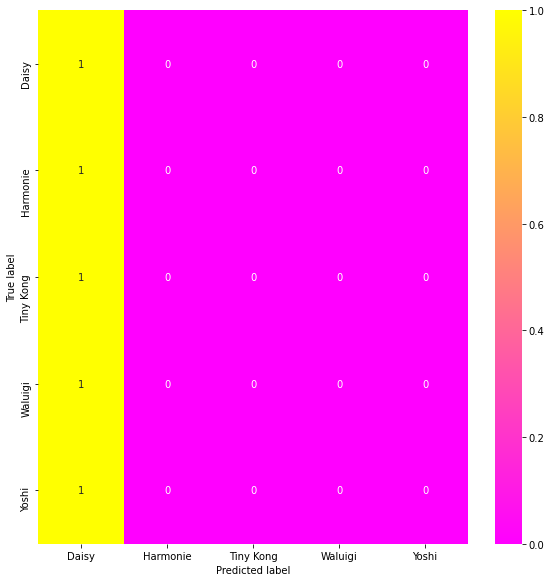

In [13]:
import matplotlib.pyplot as plt
import keras
from sklearn.metrics import confusion_matrix
import itertools
import tensorflow as tf
import seaborn as sns
import pandas as pd
X_train =x_train/255

X_test = x_test/255
CNN2 = keras.Sequential()
CNN2.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', strides=(1,1)))
CNN2.add(keras.layers.BatchNormalization())
CNN2.add(keras.layers.Flatten())
CNN2.add(keras.layers.Dense(64, activation='relu'))
CNN2.add(keras.layers.Dense(15, activation='softmax'))
 
CNN2.compile(optimizer=keras.optimizers.Adam(lr=1e-3), loss='sparse_categorical_crossentropy',metrics='accuracy')
 
history = CNN2.fit(X_train, y_train, epochs=10, batch_size=100, validation_split=0.33)
    
print("Test evaluation")
CNN2.evaluate(X_test, y_test)

#history = model.fit(X, Y, validation_split=0.33, epochs=150, batch_size=10, verbose=0)
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

y_pred=CNN2.predict_classes(X_test)
con_mat = tf.math.confusion_matrix(labels=y_test, predictions=y_pred).numpy()
con_mat_norm = np.around(con_mat.astype('float') / con_mat.sum(axis=1)[:, np.newaxis], decimals=2)
con_mat_df = pd.DataFrame(con_mat_norm,
                     index = class_names, 
                     columns = class_names)
  
figure = plt.figure(figsize=(8,8))
sns.heatmap(con_mat_df, annot=True,cmap=plt.cm.spring)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [14]:
score_train = CNN2.evaluate(x_train, y_train, verbose=1)
print(f'Train results - Loss: {score_train[0]} - Accuracy: {score_train[1]}')
score_test = CNN2.evaluate(x_test, y_test, verbose=1)
print(f'Test results - Loss: {score_test[0]} - Accuracy: {score_test[1]}')

15/15 [==============================] - 3s 171ms/step - loss: 2.3558 - accuracy: 0.1699
Train results - Loss: 2.3558034896850586 - Accuracy: 0.16993464529514313
7/7 [==============================] - 1s 162ms/step - loss: 2.3947 - accuracy: 0.1765
Test results - Loss: 2.394725799560547 - Accuracy: 0.1764705926179886


Epoch 1/10
4/4 [==============================] - 6s 1s/step - loss: 2.5389 - accuracy: 0.2398 - val_loss: 5.1293 - val_accuracy: 0.0000e+00
Epoch 2/10
4/4 [==============================] - 5s 1s/step - loss: 1.5024 - accuracy: 0.4437 - val_loss: 7.6939 - val_accuracy: 0.0000e+00
Epoch 3/10
4/4 [==============================] - 5s 1s/step - loss: 1.3745 - accuracy: 0.3123 - val_loss: 9.1734 - val_accuracy: 0.0000e+00
Epoch 4/10
4/4 [==============================] - 5s 1s/step - loss: 1.3604 - accuracy: 0.4359 - val_loss: 7.1605 - val_accuracy: 0.0000e+00
Epoch 5/10
4/4 [==============================] - 5s 1s/step - loss: 1.2805 - accuracy: 0.2493 - val_loss: 5.8731 - val_accuracy: 0.0000e+00
Epoch 6/10
4/4 [==============================] - 5s 1s/step - loss: 1.1828 - accuracy: 0.4657 - val_loss: 5.4977 - val_accuracy: 0.0000e+00
Epoch 7/10
4/4 [==============================] - 5s 1s/step - loss: 1.2442 - accuracy: 0.4550 - val_loss: 5.5868 - val_accuracy: 0.0000e+00
Epoch 8/10
4/

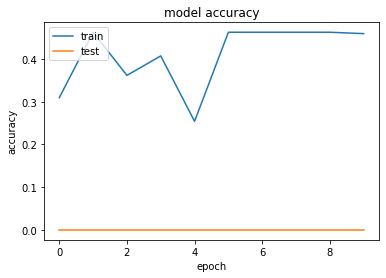

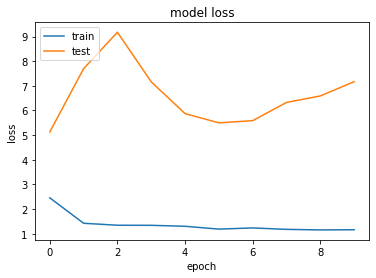

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


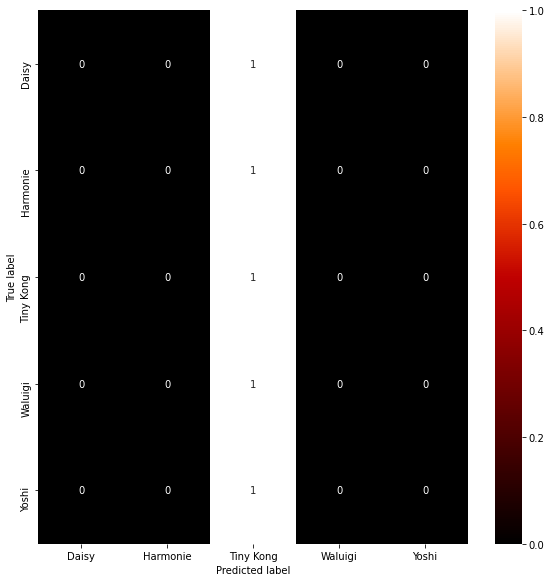

Test evaluation
7/7 [==============================] - 1s 112ms/step - loss: 3.2311 - accuracy: 0.2843


[3.231095790863037, 0.28431373834609985]

In [15]:
import matplotlib.pyplot as plt
import keras
 
CNN3 = keras.Sequential()
CNN3.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', strides=(1,1)))
CNN3.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
CNN3.add(keras.layers.Dropout(0.25))
CNN3.add(keras.layers.Flatten())
CNN3.add(keras.layers.Dense(64, activation='relu'))
CNN3.add(keras.layers.Dense(15, activation='softmax'))
 
CNN3.compile(optimizer=keras.optimizers.Adam(lr=1e-3), loss='sparse_categorical_crossentropy',metrics='accuracy')
 
history=CNN3.fit(x_train, y_train, validation_split=0.33,epochs=10, batch_size=100, verbose=1)
#history = model.fit(X, Y, validation_split=0.33, epochs=150, batch_size=10, verbose=0)
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

y_pred=CNN3.predict_classes(x_test)
con_mat = tf.math.confusion_matrix(labels=y_test, predictions=y_pred).numpy()
con_mat_norm = np.around(con_mat.astype('float') / con_mat.sum(axis=1)[:, np.newaxis], decimals=2)
con_mat_df = pd.DataFrame(con_mat_norm,
                     index = class_names, 
                     columns = class_names)
  
figure = plt.figure(figsize=(8, 8))
sns.heatmap(con_mat_df, annot=True,cmap=plt.cm.gist_heat)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()
print("Test evaluation")
CNN3.evaluate(x_test, y_test)

In [16]:
score_train = CNN3.evaluate(x_train, y_train, verbose=1)
print(f'Train results - Loss: {score_train[0]} - Accuracy: {score_train[1]}')
score_test = CNN3.evaluate(x_test, y_test, verbose=1)
print(f'Test results - Loss: {score_test[0]} - Accuracy: {score_test[1]}')

15/15 [==============================] - 2s 114ms/step - loss: 3.1721 - accuracy: 0.3094
Train results - Loss: 3.1721107959747314 - Accuracy: 0.30936819314956665
7/7 [==============================] - 1s 109ms/step - loss: 3.2311 - accuracy: 0.2843
Test results - Loss: 3.231095790863037 - Accuracy: 0.28431373834609985


Epoch 1/10
4/4 [==============================] - 8s 2s/step - loss: 2.6369 - accuracy: 0.2456 - val_loss: 3.5338 - val_accuracy: 0.0000e+00
Epoch 2/10
4/4 [==============================] - 7s 2s/step - loss: 1.6016 - accuracy: 0.4720 - val_loss: 8.1389 - val_accuracy: 0.0000e+00
Epoch 3/10
4/4 [==============================] - 7s 2s/step - loss: 1.3820 - accuracy: 0.4598 - val_loss: 8.1796 - val_accuracy: 0.0000e+00
Epoch 4/10
4/4 [==============================] - 7s 2s/step - loss: 1.4181 - accuracy: 0.2606 - val_loss: 6.8693 - val_accuracy: 0.0000e+00
Epoch 5/10
4/4 [==============================] - 7s 2s/step - loss: 1.3469 - accuracy: 0.2567 - val_loss: 5.1369 - val_accuracy: 0.0000e+00
Epoch 6/10
4/4 [==============================] - 7s 2s/step - loss: 1.2448 - accuracy: 0.4617 - val_loss: 4.8788 - val_accuracy: 0.0000e+00
Epoch 7/10
4/4 [==============================] - 7s 2s/step - loss: 1.2477 - accuracy: 0.4593 - val_loss: 5.3374 - val_accuracy: 0.0000e+00
Epoch 8/10
4/

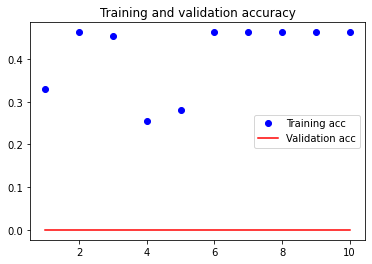

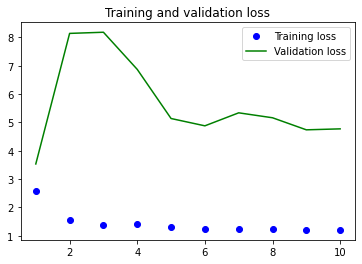

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


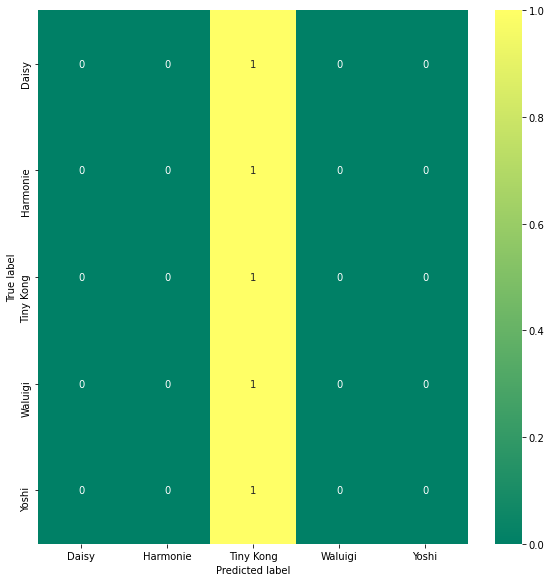

In [17]:
CNN4 = keras.Sequential()
CNN4.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', strides=(1,1)))
CNN4.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
CNN4.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', strides=(1,1)))
CNN4.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
CNN4.add(keras.layers.Dropout(0.25))
CNN4.add(keras.layers.Flatten())
CNN4.add(keras.layers.Dense(64, activation='relu'))
CNN4.add(keras.layers.Dense(15, activation='softmax'))
 
CNN4.compile(optimizer=keras.optimizers.Adam(lr=1e-3), loss='sparse_categorical_crossentropy',metrics='accuracy')
 
history = CNN4.fit(x_train, y_train, epochs=10, batch_size=100, validation_split=0.33)
    
print("Test evaluation")
CNN4.evaluate(x_test, y_test)

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'g', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

y_pred=CNN4.predict_classes(x_test)
con_mat = tf.math.confusion_matrix(labels=y_test, predictions=y_pred).numpy()
con_mat_norm = np.around(con_mat.astype('float') / con_mat.sum(axis=1)[:, np.newaxis], decimals=2)
con_mat_df = pd.DataFrame(con_mat_norm,
                     index = class_names, 
                     columns = class_names)
  
figure = plt.figure(figsize=(8, 8))
sns.heatmap(con_mat_df, annot=True,cmap=plt.cm.summer)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [18]:
score_train = CNN4.evaluate(x_train, y_train, verbose=1)
print(f'Train results - Loss: {score_train[0]} - Accuracy: {score_train[1]}')
score_test = CNN4.evaluate(x_test, y_test, verbose=1)
print(f'Test results - Loss: {score_test[0]} - Accuracy: {score_test[1]}')

15/15 [==============================] - 3s 166ms/step - loss: 2.3863 - accuracy: 0.3094
Train results - Loss: 2.3862953186035156 - Accuracy: 0.30936819314956665
7/7 [==============================] - 1s 155ms/step - loss: 2.3798 - accuracy: 0.2843
Test results - Loss: 2.379753351211548 - Accuracy: 0.28431373834609985
